In [1]:
import pandas as pd
import zipfile
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm

# Acessar base de dados
- se quiser acessar só modificar o zip_path para o arquivo da base de dados no seu computador

In [2]:
zip_path = r"C:\Users\awebe\Downloads\archive (4).zip"


with zipfile.ZipFile(zip_path, 'r') as zip_ref:
   
    print(zip_ref.namelist())  
    
  
    with zip_ref.open("all_seasons.csv") as file:  
        df = pd.read_csv(file)

print(df.isnull().sum())
df.info()

['all_seasons.csv']
Unnamed: 0              0
player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college              1854
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float6

In [3]:
df.drop('Unnamed: 0', axis = 1, inplace = True)

df['draft_round'] = df['draft_round'].replace('Undrafted', 0)
df['draft_number'] = df['draft_number'].replace('Undrafted', 0)

df['draft_round'] = df['draft_round'].astype(int)
df['draft_number'] = df['draft_number'].astype(int)

def extract_start_year(season_str):
    return int(season_str[:4])  

df['season'] = df['season'].apply(extract_start_year)
display(df.describe())

,age,player_height,player_weight,draft_round,draft_number,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,27.045313,200.555097,100.263279,1.059172,17.774914,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595,2009.609467
std,4.339211,9.111090,12.426628,0.683223,16.803276,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172,7.879836
min,18.000000,160.020000,60.327736,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1996.000000
25%,24.000000,193.040000,90.718400,1.000000,3.000000,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000,2003.000000
50%,26.000000,200.660000,99.790240,1.000000,14.000000,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000,2010.000000
75%,30.000000,208.280000,108.862080,1.000000,29.000000,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000,2017.000000
max,44.000000,231.140000,163.293120,8.000000,165.000000,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000,2022.000000


# Gráficos de distribuição de variaveis importantes e suas classificações 

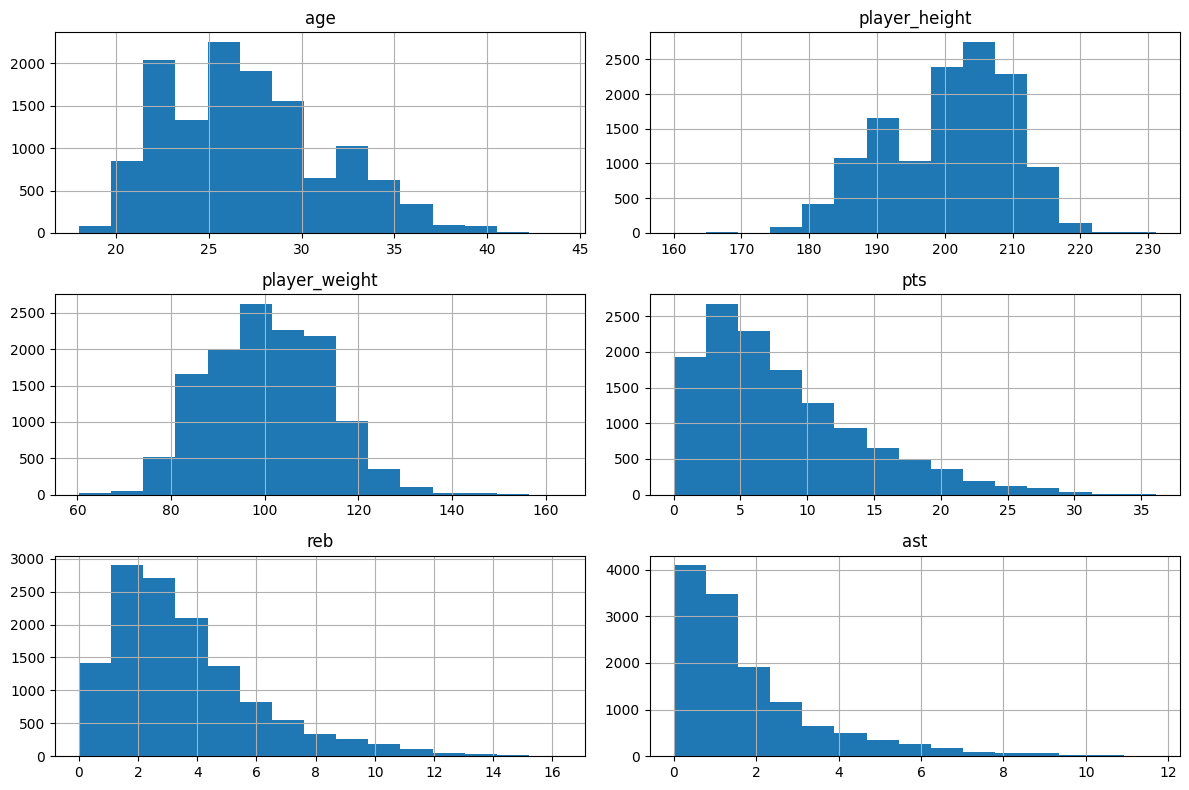

Estatísticas descritivas:
                 age  player_height  player_weight           pts           reb  \
count  12844.000000   12844.000000   12844.000000  12844.000000  12844.000000   
mean      27.045313     200.555097     100.263279      8.212582      3.558486   
std        4.339211       9.111090      12.426628      6.016573      2.477885   
min       18.000000     160.020000      60.327736      0.000000      0.000000   
25%       24.000000     193.040000      90.718400      3.600000      1.800000   
50%       26.000000     200.660000      99.790240      6.700000      3.000000   
75%       30.000000     208.280000     108.862080     11.500000      4.700000   
max       44.000000     231.140000     163.293120     36.100000     16.300000   

                ast  
count  12844.000000  
mean       1.824681  
std        1.800840  
min        0.000000  
25%        0.600000  
50%        1.200000  
75%        2.400000  
max       11.700000  

Skewness de cada coluna:
 age              0

In [4]:
num_cols = ['age', 'player_height', 'player_weight', 'pts', 'reb', 'ast']
df[num_cols].hist(bins=15, figsize=(12, 8))
plt.tight_layout()
plt.show()

desc = df[num_cols].describe()
skew_vals = df[num_cols].skew()
kurt_vals = df[num_cols].kurt()

print("Estatísticas descritivas:\n", desc)
print("\nSkewness de cada coluna:\n", skew_vals)
print("\nKurtosis (excess kurtosis) de cada coluna:\n", kurt_vals)


# Interpretação das estatisticas de distribuição:
- peso dos atletas e altura são proximas de uma distribuição simétrica, com um leve skew para a esquerda e também leve curtose negativa
- pontos, rebotes e assistência são bem simétricas a direita, caudas longas e curtose positiva. Se conclui que há poucos jogadores com estatisticas com desempenho destoante, criando picos acentuados

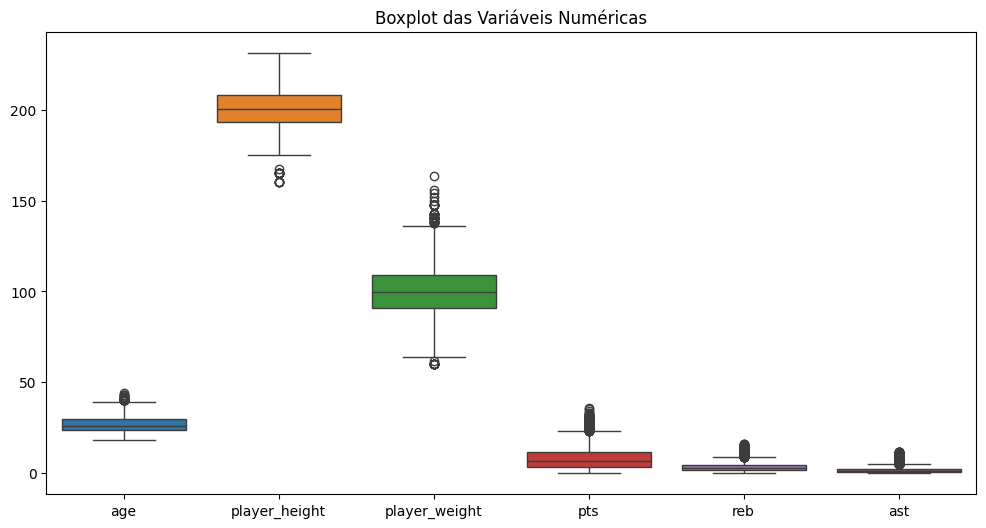

In [5]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df[num_cols])
plt.title('Boxplot das Variáveis Numéricas')
plt.show()

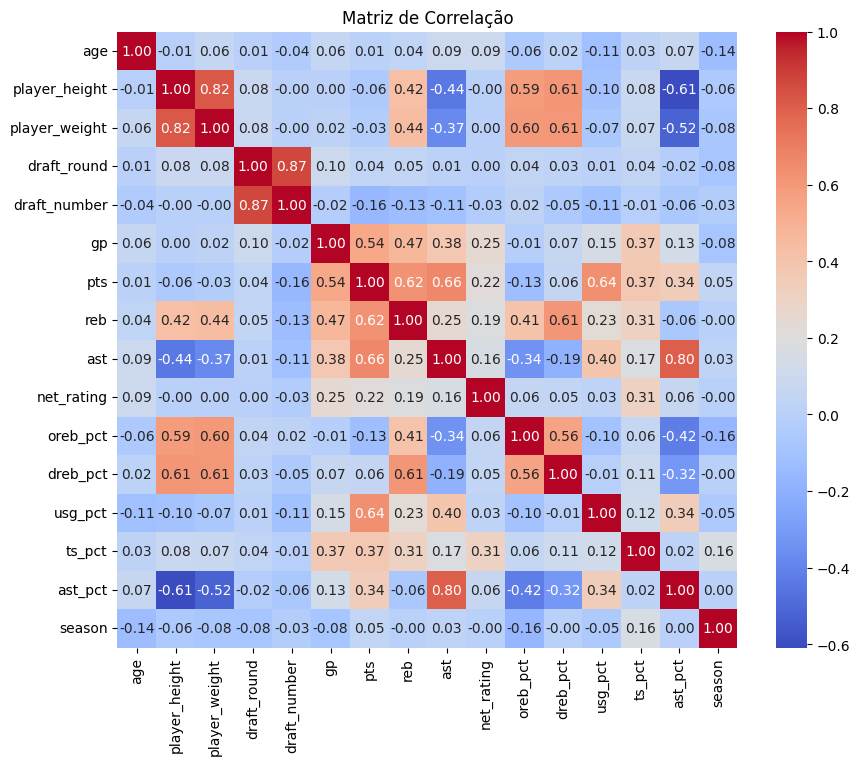

In [6]:
#Matriz de correlação para explorar a relação das variaveis
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

In [7]:
# preparação 
corr_unstacked = corr.unstack().reset_index()
corr_unstacked.columns = ['var1', 'var2', 'correlation']

# Corrigi as correlações
corr_pairs = corr_unstacked[corr_unstacked['var1'] < corr_unstacked['var2']]
corr_pairs = corr_pairs.reindex(corr_pairs['correlation'].abs().sort_values(ascending=False).index)

# Defini um threshold de correlação
threshold = 0.5
strong_corr_pairs = corr_pairs[abs(corr_pairs['correlation']) >= threshold]

print("=== PARES DE CORRELAÇÃO FORTE (|corr| >= 0.5) ===")
for idx, row in strong_corr_pairs.iterrows():
    print(f"{row['var1']} x {row['var2']}: {row['correlation']:.2f}")

#top maiores correlações
print("\n=== TOP 10 PARES POR CORRELAÇÃO ABSOLUTA ===")
print(corr_pairs.head(10))

=== PARES DE CORRELAÇÃO FORTE (|corr| >= 0.5) ===
draft_number x draft_round: 0.87
player_height x player_weight: 0.82
ast x ast_pct: 0.80
ast x pts: 0.66
pts x usg_pct: 0.64
pts x reb: 0.62
dreb_pct x player_height: 0.61
dreb_pct x reb: 0.61
ast_pct x player_height: -0.61
dreb_pct x player_weight: 0.61
oreb_pct x player_weight: 0.60
oreb_pct x player_height: 0.59
dreb_pct x oreb_pct: 0.56
gp x pts: 0.54
ast_pct x player_weight: -0.52

=== TOP 10 PARES POR CORRELAÇÃO ABSOLUTA ===
              var1           var2  correlation
67    draft_number    draft_round     0.869180
18   player_height  player_weight     0.822141
142            ast        ast_pct     0.803150
134            ast            pts     0.664320
108            pts        usg_pct     0.641469
103            pts            reb     0.624509
177       dreb_pct  player_height     0.614273
183       dreb_pct            reb     0.611899
225        ast_pct  player_height    -0.608696
178       dreb_pct  player_weight     0.60563

# Interessante analise entre jogadores que foram selecionados no draft e chegaram na liga sem serem draftados
- A diferença na comparação a seguir já era esperada, visto que os times usam estatistica e desempenho dos jogadores já na faculdade para poder tem perspectiva do desempenho deles na liga

In [8]:
df['drafted'] = df['draft_round'].apply(lambda x: 'Undrafted' if x == 0 else 'Drafted')

# Média de algumas métricas de desempenho por grupo
draft_compare = df.groupby('drafted')[['pts','reb','ast','net_rating']].mean()
print(draft_compare)

                pts       reb       ast  net_rating
drafted                                            
Drafted    9.013791  3.858972  1.962223   -1.862281
Undrafted  4.756144  2.262185  1.231320   -3.796897


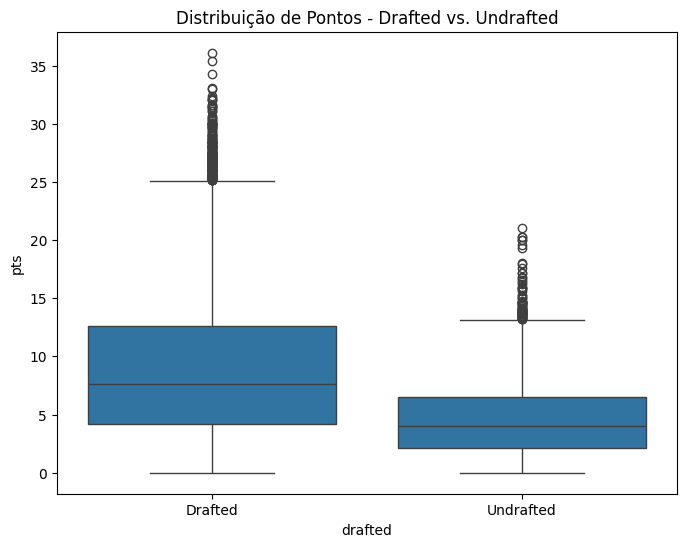

In [9]:
plt.figure(figsize=(8,6))
sns.boxplot(x='drafted', y='pts', data=df)
plt.title("Distribuição de Pontos - Drafted vs. Undrafted")
plt.show()

# Gráficos de distribuição entre os 2 grupos

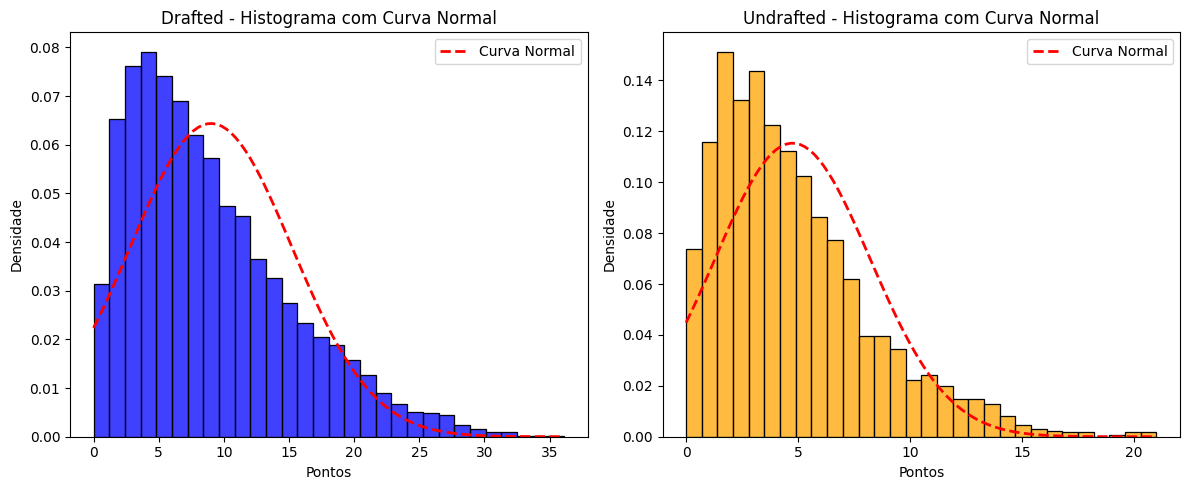

In [10]:
df_drafted = df[df['drafted'] == 'Drafted']['pts'].dropna()
df_undrafted = df[df['drafted'] == 'Undrafted']['pts'].dropna()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# SUBPLOT 1: DRAFTADOS
# a) Histograma (eixo Y em densidade, não contagem)
sns.histplot(df_drafted, kde=False, stat='density', bins=30, color='blue', ax=axes[0])

# b) Calcular curva normal estimada
mean_d = df_drafted.mean()
std_d  = df_drafted.std()

x_d = np.linspace(df_drafted.min(), df_drafted.max(), 100)
y_d = norm.pdf(x_d, mean_d, std_d)  # Densidade da Normal com mean_d, std_d

# c) Plotar a curva normal por cima
axes[0].plot(x_d, y_d, 'r--', linewidth=2, label='Curva Normal')

axes[0].set_title("Drafted - Histograma com Curva Normal")
axes[0].set_xlabel("Pontos")
axes[0].set_ylabel("Densidade")
axes[0].legend()


# SUBPLOT 2: NÃO DRAFTADOS
sns.histplot(df_undrafted, kde=False, stat='density', bins=30, color='orange', ax=axes[1])

mean_u = df_undrafted.mean()
std_u  = df_undrafted.std()

x_u = np.linspace(df_undrafted.min(), df_undrafted.max(), 100)
y_u = norm.pdf(x_u, mean_u, std_u)

axes[1].plot(x_u, y_u, 'r--', linewidth=2, label='Curva Normal')

axes[1].set_title("Undrafted - Histograma com Curva Normal")
axes[1].set_xlabel("Pontos")
axes[1].set_ylabel("Densidade")
axes[1].legend()

plt.tight_layout()
plt.show()

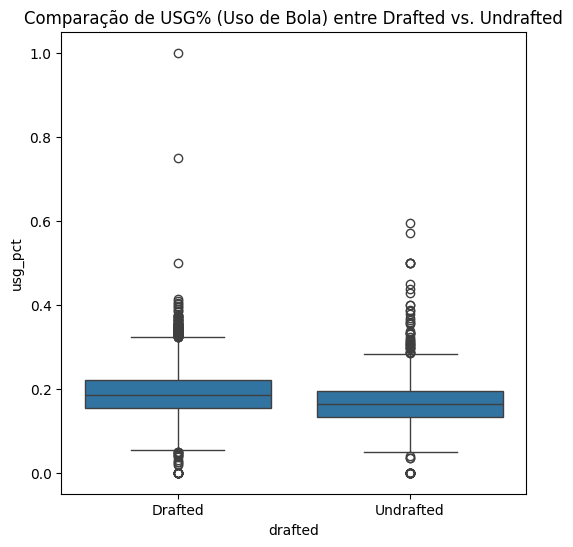

In [11]:
#Boxplot para comparar, por exemplo, USG% entre Drafted e Undrafted
#------------------------------------------------------------------
#Poucos jogadores entre os draftados tem Usg mais alto do que o topo dos não draftados
plt.figure(figsize=(6,6))
sns.boxplot(x='drafted', y='usg_pct', data=df)
plt.title('Comparação de USG% (Uso de Bola) entre Drafted vs. Undrafted')
plt.show()

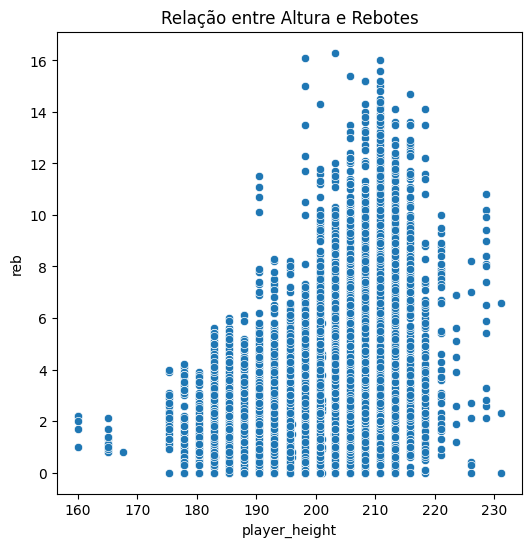

In [12]:
# Gráfico para relação entre altura e rebotes, obviamente vantagem fisica fornece um vantagem Grande nesse aspecto
plt.figure(figsize=(6,6))
sns.scatterplot(x='player_height', y='reb', data=df)
plt.title('Relação entre Altura e Rebotes')
plt.show()

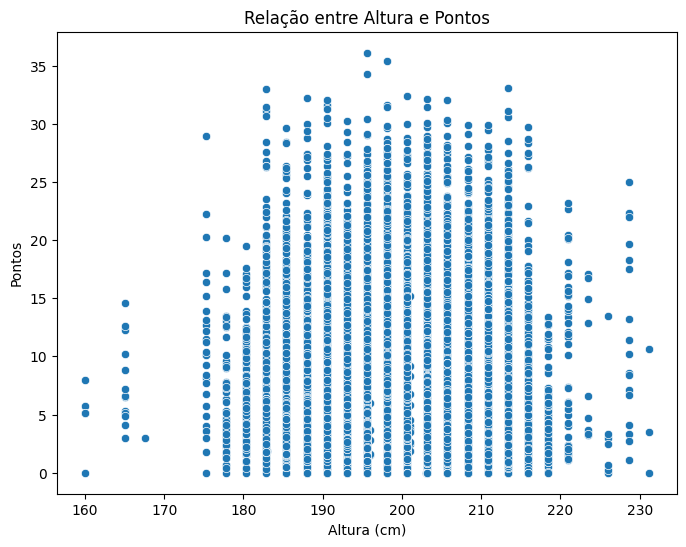

In [13]:
# Já a relação entre pontos é mais "normalizado", podemos até traçar um paradeiro histórico como o padrão do jogo de basquete mudou, bolas de três 
#-  acabaram virando a arma mais letal do basquete, e jogadores menores com agilidade tem ligeira vantagem nesse aspecto especifico, como a analise
#- não é por ano, fica mais dificil vizualiar essa transformação
plt.figure(figsize=(8,6))
sns.scatterplot(x='player_height', y='pts', data=df)
plt.title("Relação entre Altura e Pontos")
plt.xlabel("Altura (cm)")
plt.ylabel("Pontos")
plt.show()

C:\Users\awebe\AppData\Local\Temp\ipykernel_24040\2382497220.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(


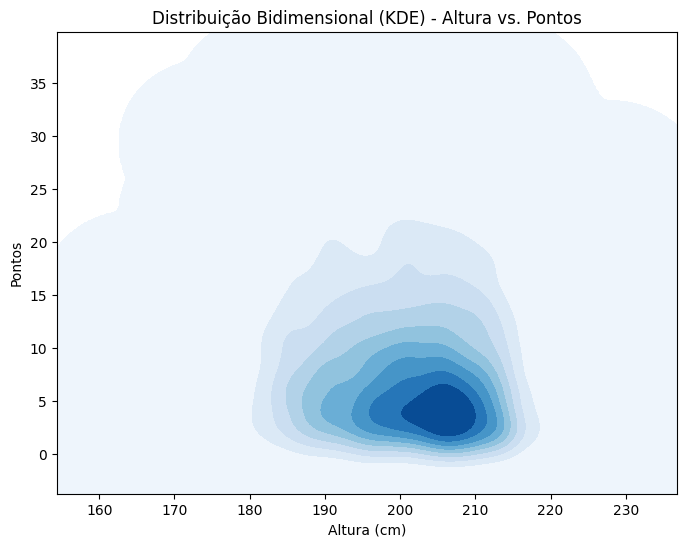

In [14]:
# Distribuição que acentua a diferença de jogadores por idade e também mostra aonde a maioria dos jogadores está na media de pontuação
#- Nota-se que é mais facil um jogador muito alto ter mais media de pontos que um muito baixo (em ambos os extremos)
plt.figure(figsize=(8,6))
sns.kdeplot(
    x='player_height', 
    y='pts', 
    data=df, 
    cmap="Blues", 
    shade=True, 
    thresh=0
)
plt.title('Distribuição Bidimensional (KDE) - Altura vs. Pontos')
plt.xlabel('Altura (cm)')
plt.ylabel('Pontos')
plt.show()

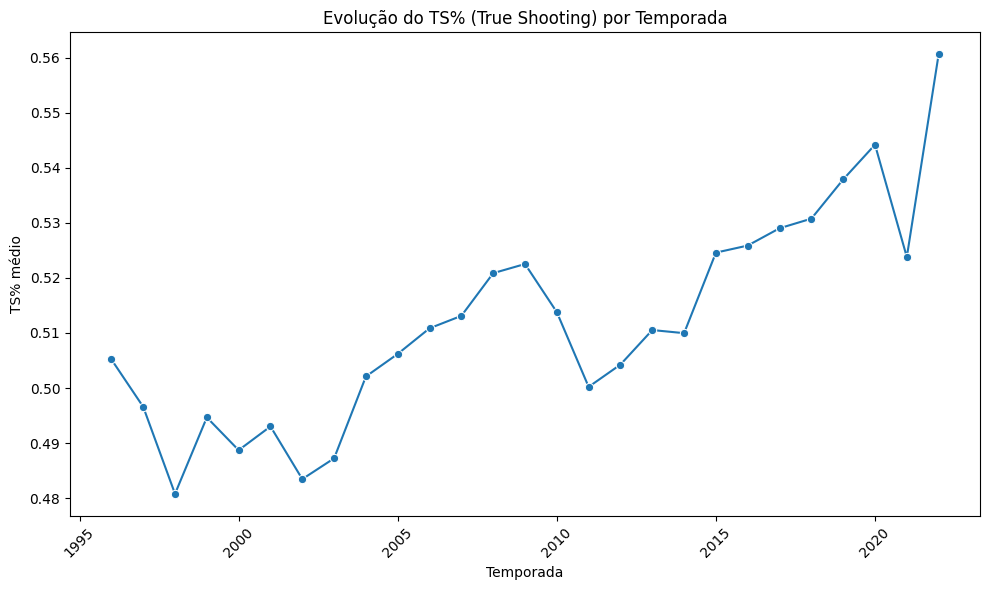

In [15]:
# Exemplo de agrupamento por temporada
ts_season = df.groupby('season')['ts_pct'].mean().reset_index()

# Plotar a evolução do ts_pct ao longo das temporadas
plt.figure(figsize=(10,6))
sns.lineplot(x='season', y='ts_pct', data=ts_season, marker='o')
plt.title('Evolução do TS% (True Shooting) por Temporada')
plt.xlabel('Temporada')
plt.ylabel('TS% médio')
plt.xticks(rotation=45)  
plt.tight_layout()
plt.show()

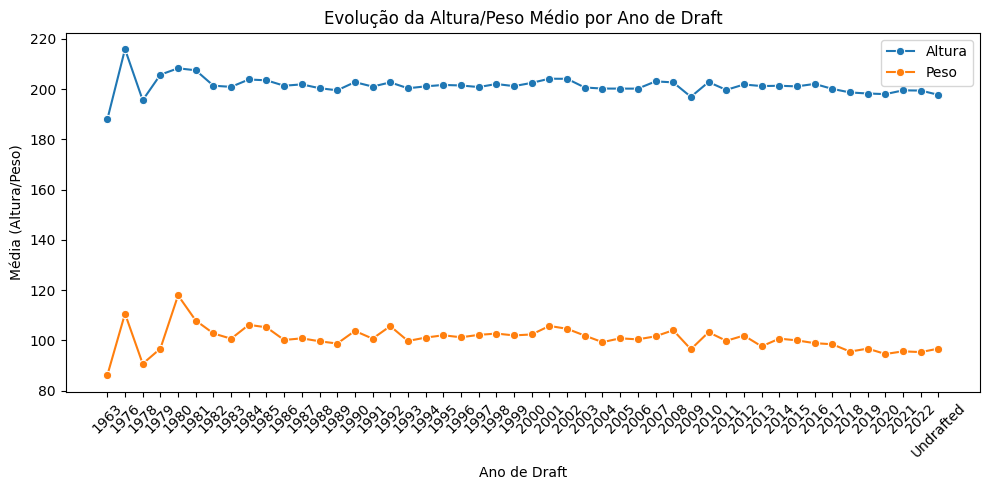

In [16]:
height_weight_by_draft = df.groupby('draft_year')[['player_height', 'player_weight']].mean().reset_index()

plt.figure(figsize=(10,5))
sns.lineplot(x='draft_year', y='player_height', data=height_weight_by_draft, marker='o', label='Altura')
sns.lineplot(x='draft_year', y='player_weight', data=height_weight_by_draft, marker='o', label='Peso')
plt.title('Evolução da Altura/Peso Médio por Ano de Draft')
plt.xlabel('Ano de Draft')
plt.ylabel('Média (Altura/Peso)')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Tentando responder se um jogador draftado dura mais que um draftado na liga, eu pessoalmente nunca tinha visto tal analise antes

In [17]:
# 1) Quantas temporadas cada jogador atuou??
df_player = df.groupby('player_name')['season'].nunique().reset_index()
df_player.columns = ['player_name','num_seasons']

# 2) Juntar essa info de volta para ter 'drafted'
#    Se 'drafted' não estiver no nível de jogador, mas repetido em cada season, 
draft_info = df.groupby('player_name')['drafted'].first().reset_index()

df_player = df_player.merge(draft_info, on='player_name', how='left')

# 3) Calcular média de temporadas jogadas por grupo
survival_compare = df_player.groupby('drafted')['num_seasons'].mean().reset_index()
print(survival_compare)

     drafted  num_seasons
0    Drafted     5.941880
1  Undrafted     3.030151


In [18]:
# Comparação de proporção e probabilidade historico entre jogadores draftados e não draftados de chegarem a esses tresholds selecionados 

thresholds = [5, 10, 15, 20]
for t in thresholds:
    prob_drafted = (df[(df['drafted'] == 'Drafted')]['pts'] > t).mean()
    prob_undrafted = (df[(df['drafted'] == 'Undrafted')]['pts'] > t).mean()
    
    print(f"Para threshold = {t}")
    print(f"Probabilidade (pts > {t} | Drafted)   = {prob_drafted:.2%}")
    print(f"Probabilidade (pts > {t} | Undrafted) = {prob_undrafted:.2%}")
    

Para threshold = 5
Probabilidade (pts > 5 | Drafted)   = 67.83%
Probabilidade (pts > 5 | Undrafted) = 38.19%
Para threshold = 10
Probabilidade (pts > 10 | Drafted)   = 36.20%
Probabilidade (pts > 10 | Undrafted) = 8.69%
Para threshold = 15
Probabilidade (pts > 15 | Drafted)   = 17.05%
Probabilidade (pts > 15 | Undrafted) = 0.99%
Para threshold = 20
Probabilidade (pts > 20 | Drafted)   = 6.69%
Probabilidade (pts > 20 | Undrafted) = 0.12%


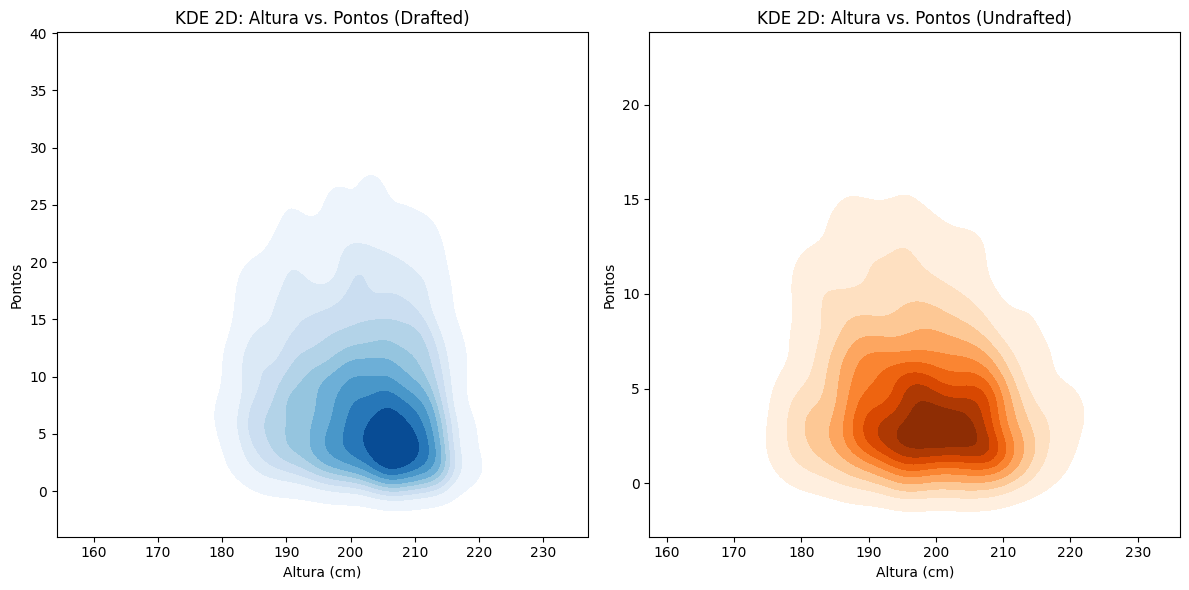

In [19]:
# Filtrar os dois grupos
df_drafted = df[df['drafted'] == 'Drafted']
df_undrafted = df[df['drafted'] == 'Undrafted']

# Criar figura com 2 subplots lado a lado
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# --- Subplot 1: Drafted ---
sns.kdeplot(
    data=df_drafted,
    x='player_height',
    y='pts',
    fill=True,       # ou shade=True em versões mais antigas do Seaborn
    cmap='Blues',
    ax=axes[0]       # <--- importante!
)
axes[0].set_title('KDE 2D: Altura vs. Pontos (Drafted)')
axes[0].set_xlabel('Altura (cm)')
axes[0].set_ylabel('Pontos')

# --- Subplot 2: Undrafted ---
sns.kdeplot(
    data=df_undrafted,
    x='player_height',
    y='pts',
    fill=True,       # ou shade=True em versões mais antigas do Seaborn
    cmap='Oranges',
    ax=axes[1]       # <--- importante!
)
axes[1].set_title('KDE 2D: Altura vs. Pontos (Undrafted)')
axes[1].set_xlabel('Altura (cm)')
axes[1].set_ylabel('Pontos')

plt.tight_layout()
plt.show()

# No grafico acima não notamos grande diferença de altura entre draft e undrafted, a diferença fica mais explicita pela diferença de pontos devido
# ao eixo dos pontos

C:\Users\awebe\AppData\Local\Temp\ipykernel_24040\1888181415.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_pts_by_height = df.groupby('height_bin')['pts'].mean().reset_index()
C:\Users\awebe\AppData\Local\Temp\ipykernel_24040\1888181415.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='height_bin', y='pts', data=avg_pts_by_height, palette='viridis')


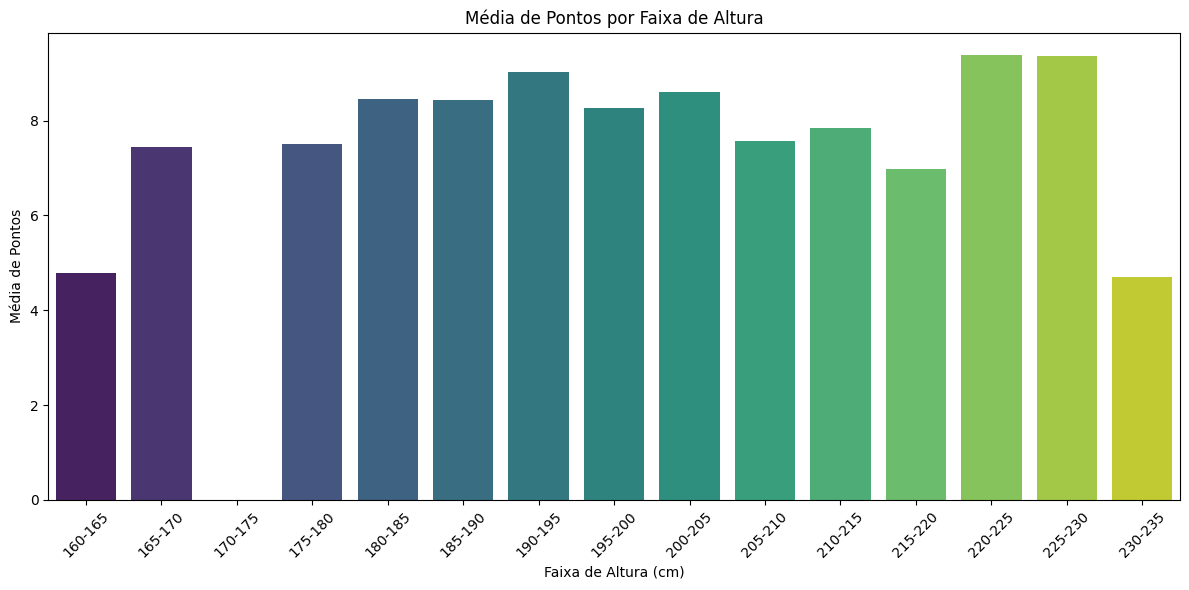

In [20]:
min_height = int(df['player_height'].min())
max_height = int(df['player_height'].max())
bins = list(range(min_height, max_height + 5, 5))  # bins com intervalo de 5 cm
labels = [f'{b}-{b+5}' for b in bins[:-1]]

# Criar coluna de faixa de altura
df['height_bin'] = pd.cut(df['player_height'], bins=bins, labels=labels, right=False)

# Calcular a média de pontos para cada faixa de altura
avg_pts_by_height = df.groupby('height_bin')['pts'].mean().reset_index()

# Plotar o gráfico (por exemplo, um barplot)
plt.figure(figsize=(12,6))
sns.barplot(x='height_bin', y='pts', data=avg_pts_by_height, palette='viridis')
plt.title('Média de Pontos por Faixa de Altura')
plt.xlabel('Faixa de Altura (cm)')
plt.ylabel('Média de Pontos')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

C:\Users\awebe\AppData\Local\Temp\ipykernel_24040\4233321850.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df.groupby('height_bin').agg({


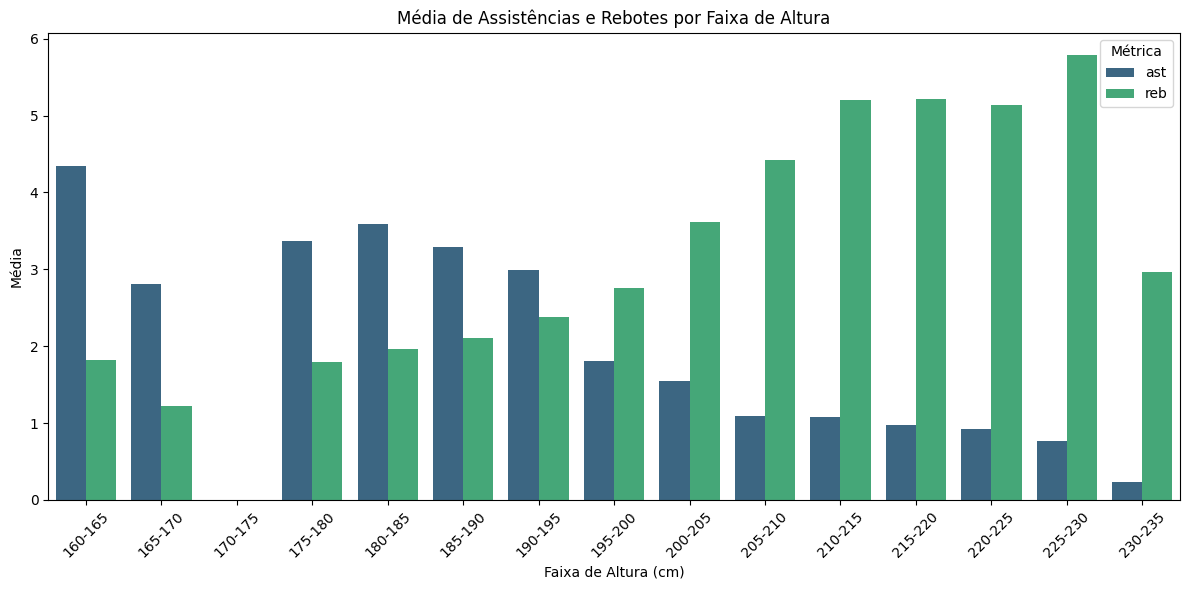

In [21]:
min_height = int(df['player_height'].min())
max_height = int(df['player_height'].max())
bins = list(range(min_height, max_height + 5, 5))  # Cria intervalos de 5 em 5 cm
labels = [f'{b}-{b+5}' for b in bins[:-1]]

# 2. Criar a coluna de faixa de altura
df['height_bin'] = pd.cut(df['player_height'], bins=bins, labels=labels, right=False)

# 3. Agrupar por faixa de altura e calcular a média de assistências (ast) e rebotes (reb)
grouped = df.groupby('height_bin').agg({
    'ast': 'mean',
    'reb': 'mean'
}).reset_index()

# 4. Converter para formato "long" para facilitar o uso do hue no Seaborn
grouped_melt = grouped.melt(id_vars='height_bin', value_vars=['ast', 'reb'],
                             var_name='Métrica', value_name='Média')

# 5. Plotar os dados usando um barplot (duas barras lado a lado para cada faixa)
plt.figure(figsize=(12,6))
sns.barplot(data=grouped_melt, x='height_bin', y='Média', hue='Métrica', palette='viridis')
plt.title('Média de Assistências e Rebotes por Faixa de Altura')
plt.xlabel('Faixa de Altura (cm)')
plt.ylabel('Média')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# a Diferença entre especificações e funcões no time por altura, infelizmente na base não temos a posição de cada jogador, porem concluimos que:
- jogadores menores fazem mais a armação do jogo, e conseguem pegar bem menos rebotes do que jogadores maiores
- a escala de posições é por altura ("commom knowledge"), visto isso fica mais explicito nesse gráfico a diferença de obrigações em um time

Jogadores identificados como outliers de desempenho:
            player_name  player_height  player_weight   pts  residuals  \
7             Glen Rice         203.20      99.790240  26.8  18.788927   
18      Hakeem Olajuwon         213.36     115.665960  23.2  15.423020   
206    Shaquille O'Neal         215.90     136.077600  26.2  17.979721   
318    Latrell Sprewell         195.58      86.182480  24.2  16.065271   
367         Karl Malone         205.74     116.119552  27.4  19.070219   
...                 ...            ...            ...   ...        ...   
12774     Jalen Brunson         187.96      86.182480  24.0  15.326313   
12781         Ja Morant         187.96      78.925008  26.2  17.747807   
12822      Jaylen Brown         198.12     101.151016  26.6  18.188092   
12825      Jayson Tatum         203.20      95.254320  30.1  22.227361   
12839       Joel Embiid         213.36     127.005760  33.1  24.976936   

       residual_z  
7        3.129667  
18       2.569009 

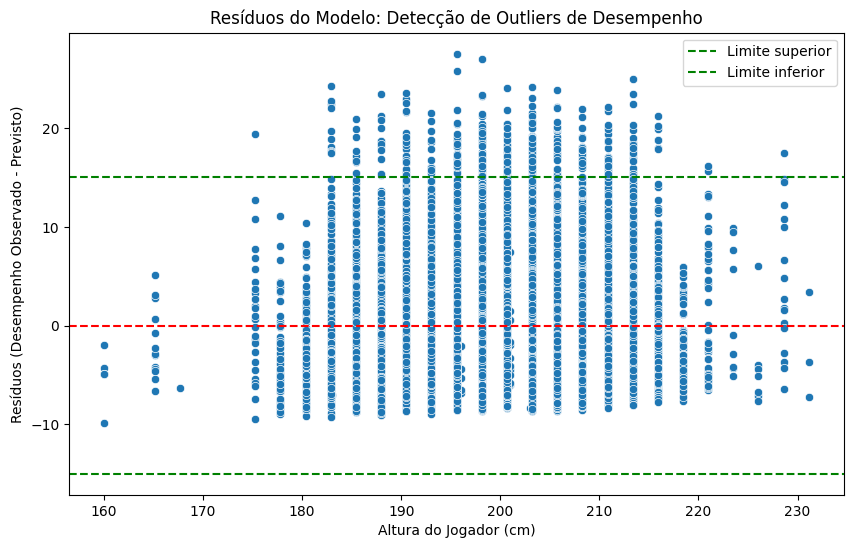

In [22]:
import statsmodels.api as sm
# Selecionar as variáveis preditoras (características físicas) e a variável resposta (desempenho, no caso pontos)
X = df[['player_height', 'player_weight']]
y = df['pts']

# Adicionar uma constante para o modelo de regressão (intercepto)
X_const = sm.add_constant(X)

# Ajustar o modelo de regressão linear
modelo = sm.OLS(y, X_const).fit()

# Calcular os resíduos (diferença entre o desempenho observado e o previsto)
df['residuals'] = modelo.resid

# 5. Calcular o Z-score dos resíduos para identificar outliers
df['residual_z'] = (df['residuals'] - df['residuals'].mean()) / df['residuals'].std()

# Definir um limiar para considerar outlier (por exemplo, |Z| > 2.5)
limiar = 2.5
outliers = df[np.abs(df['residual_z']) > limiar]

print("Jogadores identificados como outliers de desempenho:")
print(outliers[['player_name', 'player_height', 'player_weight', 'pts', 'residuals', 'residual_z']])

# 6. Visualizar os resíduos em função da altura (ou de outra variável)
plt.figure(figsize=(10,6))
sns.scatterplot(x='player_height', y='residuals', data=df)
plt.axhline(0, color='red', linestyle='--')
plt.axhline(limiar * df['residuals'].std() + df['residuals'].mean(), color='green', linestyle='--', label='Limite superior')
plt.axhline(-limiar * df['residuals'].std() + df['residuals'].mean(), color='green', linestyle='--', label='Limite inferior')
plt.xlabel('Altura do Jogador (cm)')
plt.ylabel('Resíduos (Desempenho Observado - Previsto)')
plt.title('Resíduos do Modelo: Detecção de Outliers de Desempenho')
plt.legend()
plt.show()

In [23]:
######             Vamos criar um modelo de avaliação de performance mais similar possivel com o player efficiency da ESPN (https://en.wikipedia.org/wiki/Player_efficiency_rating#:~:text=The%20player%20efficiency%20rating%20(PER,rates%20every%20player's%20statistical%20performance.)
######             Só que por limitações da base de dados nossas opções são extremamente restritas
df['pts_per_game'] = df['pts'] / df['gp'].replace(0, np.nan)
df['reb_per_game'] = df['reb'] / df['gp'].replace(0, np.nan)
df['ast_per_game'] = df['ast'] / df['gp'].replace(0, np.nan)

from scipy.stats import zscore

# Lista das colunas que vamos usar na métrica
cols_for_eff = [
    'pts_per_game',  # pontos por jogo
    'reb_per_game',  # rebotes por jogo
    'ast_per_game',  # assistências por jogo
    'net_rating',
    'ts_pct',
    'usg_pct'
]

# Caso haja NaN, podemos preencher com 0 ou filtrar; aqui vamos preencher com 0
df[cols_for_eff] = df[cols_for_eff].fillna(0)

# Criar colunas z-score
for c in cols_for_eff:
    df['z_' + c] = zscore(df[c])  # zscore de cada coluna

df['my_eff'] = (
    df['z_pts_per_game'] 
    + df['z_reb_per_game'] 
    + df['z_ast_per_game'] 
    + df['z_net_rating'] 
    + df['z_ts_pct'] 
    + df['z_usg_pct']
)
df['my_eff'] = (
    df['z_pts_per_game'] 
    + df['z_reb_per_game'] 
    + df['z_ast_per_game'] 
    + df['z_net_rating'] 
    + df['z_ts_pct'] 
    + df['z_usg_pct']
)

In [24]:
# Ordenar o DataFrame pela métrica 'my_eff' em ordem decrescente
df_sorted = df.sort_values(by='my_eff', ascending=False)

# Exibir os 10 maiores valores
top_10 = df_sorted.head(10)
print(top_10[['player_name', 'my_eff', 'pts_per_game', 'reb_per_game', 'ast_per_game']])

              player_name      my_eff  pts_per_game  reb_per_game  \
12310        RaiQuan Gray  103.799326          16.0          9.00   
11215       Elijah Bryant   70.686720          16.0          6.00   
12748          Louis King   65.190507          20.0          4.00   
10414           RJ Hunter   65.131477          17.0          3.00   
12786       Jacob Gilyard   58.259403           3.0          4.00   
10026          Jeremy Lin   57.694788          18.0          0.00   
8784        Dahntay Jones   51.564386          13.0          5.00   
1124     Randy Livingston   50.110306          12.0          2.00   
5509       Gilbert Arenas   49.746688           6.5          2.25   
7231   Quentin Richardson   46.612229           5.0         10.00   

       ast_per_game  
12310           7.0  
11215           3.0  
12748           2.0  
10414           3.0  
12786           7.0  
10026           4.0  
8784            2.0  
1124            3.0  
5509            5.0  
7231            1.0 

In [25]:
from scipy.stats import pearsonr

# 1) Agrupar por jogador e contar quantas temporadas distintas cada um jogou
df_seasons = df.groupby('player_name')['season'].nunique().reset_index()
df_seasons.columns = ['player_name','num_seasons']

# 2) Juntar (merge) essa informação ao DataFrame principal
#    (Pressupondo que 'player_name' exista no df original)
df = df.merge(df_seasons, on='player_name', how='left')

# Agora, o df tem a coluna 'num_seasons'
print(df.columns)  # Você deve ver 'num_seasons' lá

# 3) Calcular a correlação entre num_seasons e sua métrica de eficiência (my_eff)
corr, p_value = pearsonr(df['num_seasons'], df['my_eff'])
print("Correlação:", corr)
print("p-valor:", p_value)

Index(['player_name', 'team_abbreviation', 'age', 'player_height',
       'player_weight', 'college', 'country', 'draft_year', 'draft_round',
       'draft_number', 'gp', 'pts', 'reb', 'ast', 'net_rating', 'oreb_pct',
       'dreb_pct', 'usg_pct', 'ts_pct', 'ast_pct', 'season', 'drafted',
       'height_bin', 'residuals', 'residual_z', 'pts_per_game', 'reb_per_game',
       'ast_per_game', 'z_pts_per_game', 'z_reb_per_game', 'z_ast_per_game',
       'z_net_rating', 'z_ts_pct', 'z_usg_pct', 'my_eff', 'num_seasons'],
      dtype='object')
Correlação: 0.13781241588296225
p-valor: 1.7190564303545815e-55


Causalidade Inversa: Jogadores podem permanecer mais tempo porque são mais eficientes (e não se tornar mais eficientes por ficarem mais tempo).

Jogadores veteranos podem também ver a eficiência cair no final da carreira, mas se ainda estão na liga, é porque foram (ou ainda são) bons em algum aspecto.

Sobrevivência: É uma análise de “sobrevivência na liga”: quem não é produtivo, sai cedo. Então, quem fica, em média, tende a ter eficiência maior.




A idade com maior média de eficiência é 41.0 (eficiência média = 1.97)


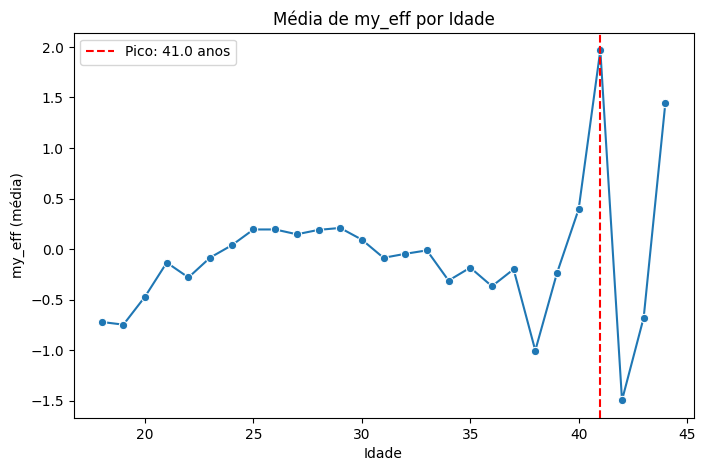

In [26]:

# 1) Agrupar por 'age' e calcular média de my_eff
df_age = df.groupby('age')['my_eff'].mean().reset_index()
df_age.columns = ['age', 'mean_eff']

# 2) Ver qual idade tem maior média de eficiência
max_row = df_age.loc[df_age['mean_eff'].idxmax()]
peak_age = max_row['age']
peak_eff = max_row['mean_eff']

print(f"A idade com maior média de eficiência é {peak_age} (eficiência média = {peak_eff:.2f})")

# 3) Visualizar
plt.figure(figsize=(8,5))
sns.lineplot(data=df_age, x='age', y='mean_eff', marker='o')
plt.axvline(x=peak_age, color='red', linestyle='--', label=f'Pico: {peak_age} anos')
plt.title('Média de my_eff por Idade')
plt.xlabel('Idade')
plt.ylabel('my_eff (média)')
plt.legend()
plt.show()